In [119]:
import os
from scipy.io import wavfile

file_path = os.path.join('H:/', 'My Library', 'Hardstyle', 'D-Sturb - Obey (Radio Edit).wav')
fs, stereo = wavfile.read(file_path)

stereo = stereo[:100000, :]

mono_1 = np.zeros(len(stereo))
mono_2 = np.zeros(len(stereo))
dual_mono = np.zeros_like(stereo)


for i, st in enumerate(stereo):
    mono_1[i] = (st[0]+st[1])/2
    mono_2[i] = np.std(st)
    dual_mono[i] = [st[0], st[0]]


<ipython-input-119-1d30fe3c7326>:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, stereo = wavfile.read(file_path)
<ipython-input-119-1d30fe3c7326>:15: RuntimeWarning: overflow encountered in short_scalars
  mono_1[i] = (st[0]+st[1])/2


In [120]:
print(stereo.shape)
print(dual_mono.shape)
print(mono_1.shape)
print(mono_2.shape)

(100000, 2)
(100000, 2)
(100000,)
(100000,)


In [121]:
import numpy as np
from app.package.services import PyOctaveBand

x_st = np.transpose(stereo)
x_mono_1 = np.transpose(mono_1)
x_mono_2 = np.transpose(mono_2)
x_dual_mono = np.transpose(dual_mono)

spl_st, freq = PyOctaveBand.octavefilter(x_st, fs, fraction=1)
spl_mono_1, freq = PyOctaveBand.octavefilter(x_mono_1, fs, fraction=1)
spl_mono_2, freq = PyOctaveBand.octavefilter(x_mono_2, fs, fraction=1)
spl_dual_mono, freq = PyOctaveBand.octavefilter(x_dual_mono, fs, fraction=1)

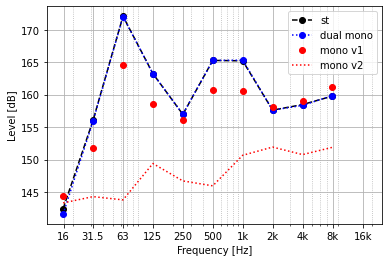

In [122]:
import matplotlib.pyplot as plt

# Show octave spectrum
fig, ax = plt.subplots()
ax.semilogx(freq, spl_st, 'ko--')
ax.semilogx(freq, spl_dual_mono, 'bo:')
ax.semilogx(freq, spl_mono_1, 'ro--')
ax.semilogx(freq, spl_mono_2, 'r:')
ax.legend(['st','dual mono','mono v1','mono v2'])
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
ax.set_xlabel(r'Frequency [Hz]')
ax.set_ylabel('Level [dB]')
plt.xlim(11, 25000)
ax.set_xticks([16, 31.5, 63, 125, 250, 500, 1000, 2000, 4000, 8000, 16000])
ax.set_xticklabels(['16', '31.5', '63', '125', '250', '500', '1k', '2k', '4k', '8k', '16k'])
plt.show()